# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- **Nama:** Deza Nur Qhodbi
- **Email:** deza.qhodbi@lintasarta.co.id
- **ID Dicoding:** dezanurq

## Business Understanding
Jaya Jaya Institut menghadapi tingkat dropout yang tinggi. Tujuan proyek ini adalah membangun sistem prediksi untuk mengidentifikasi siswa yang berisiko dropout, agar dapat dilakukan intervensi lebih awal.

## Data Understanding
- Jumlah baris: 4424
- Jumlah kolom: 37
- Target: `Status` (Dropout vs Non-Dropout)
- Tipe fitur: kombinasi numerik dan kategorikal


In [14]:
import pandas as pd
df = pd.read_csv('data.csv', sep=';')
df['Dropout'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


## Exploratory Data Analysis (EDA) - Univariate

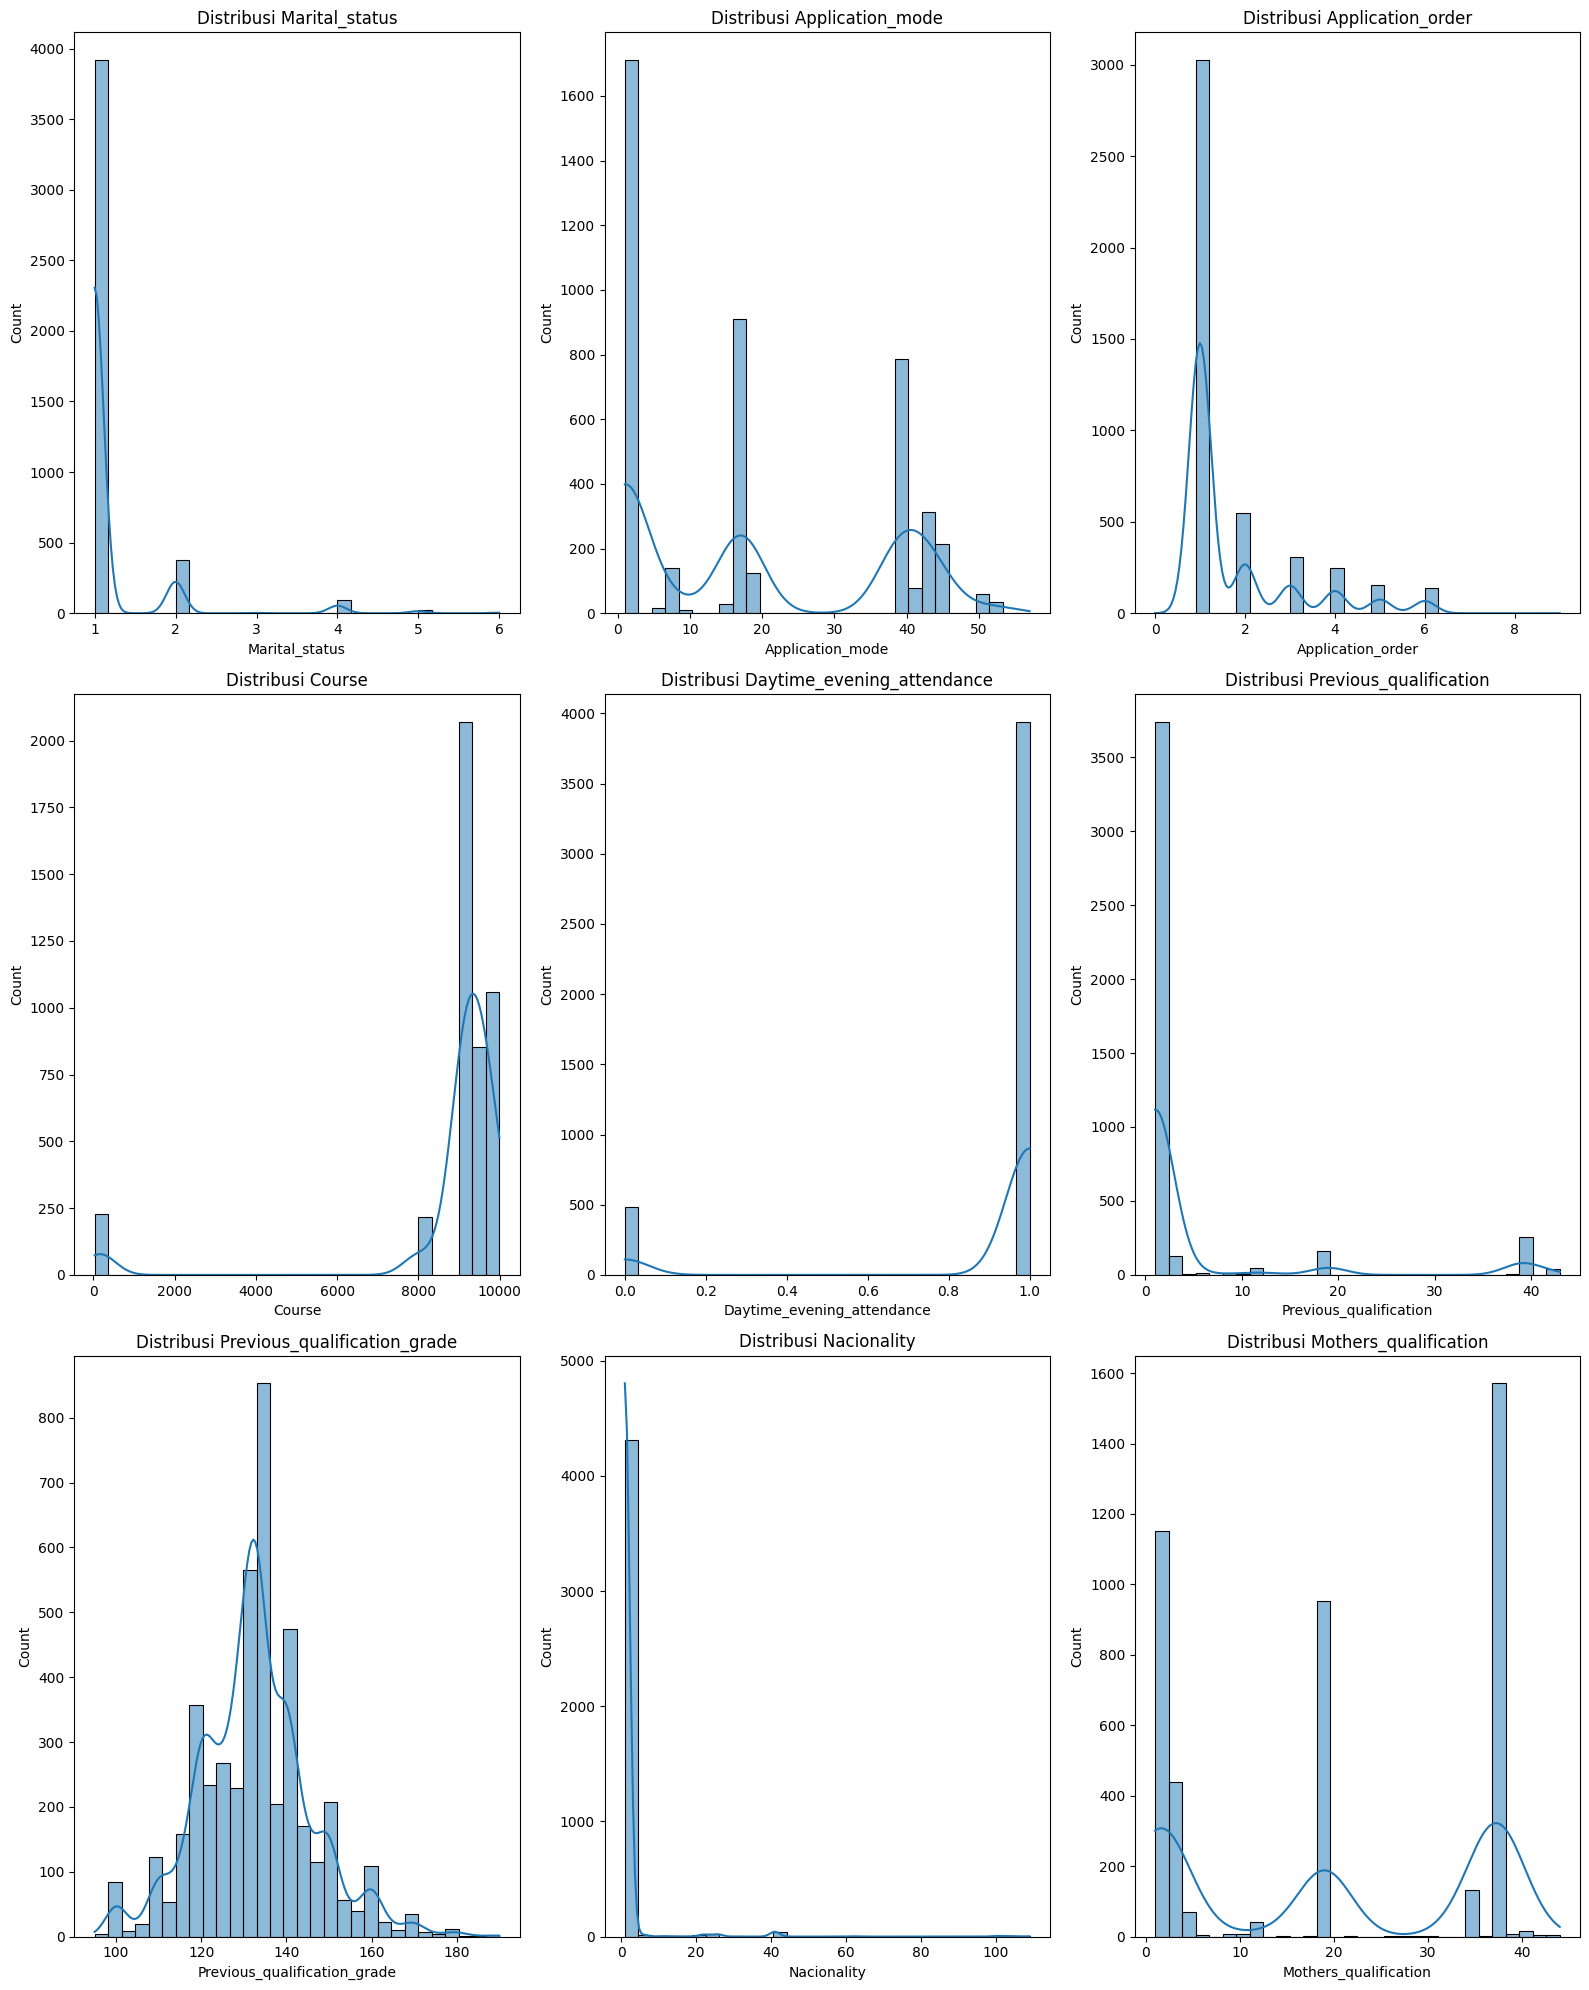

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Dropout']).columns.tolist()
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## EDA Multivariat - Fitur Kategorikal terhadap Target

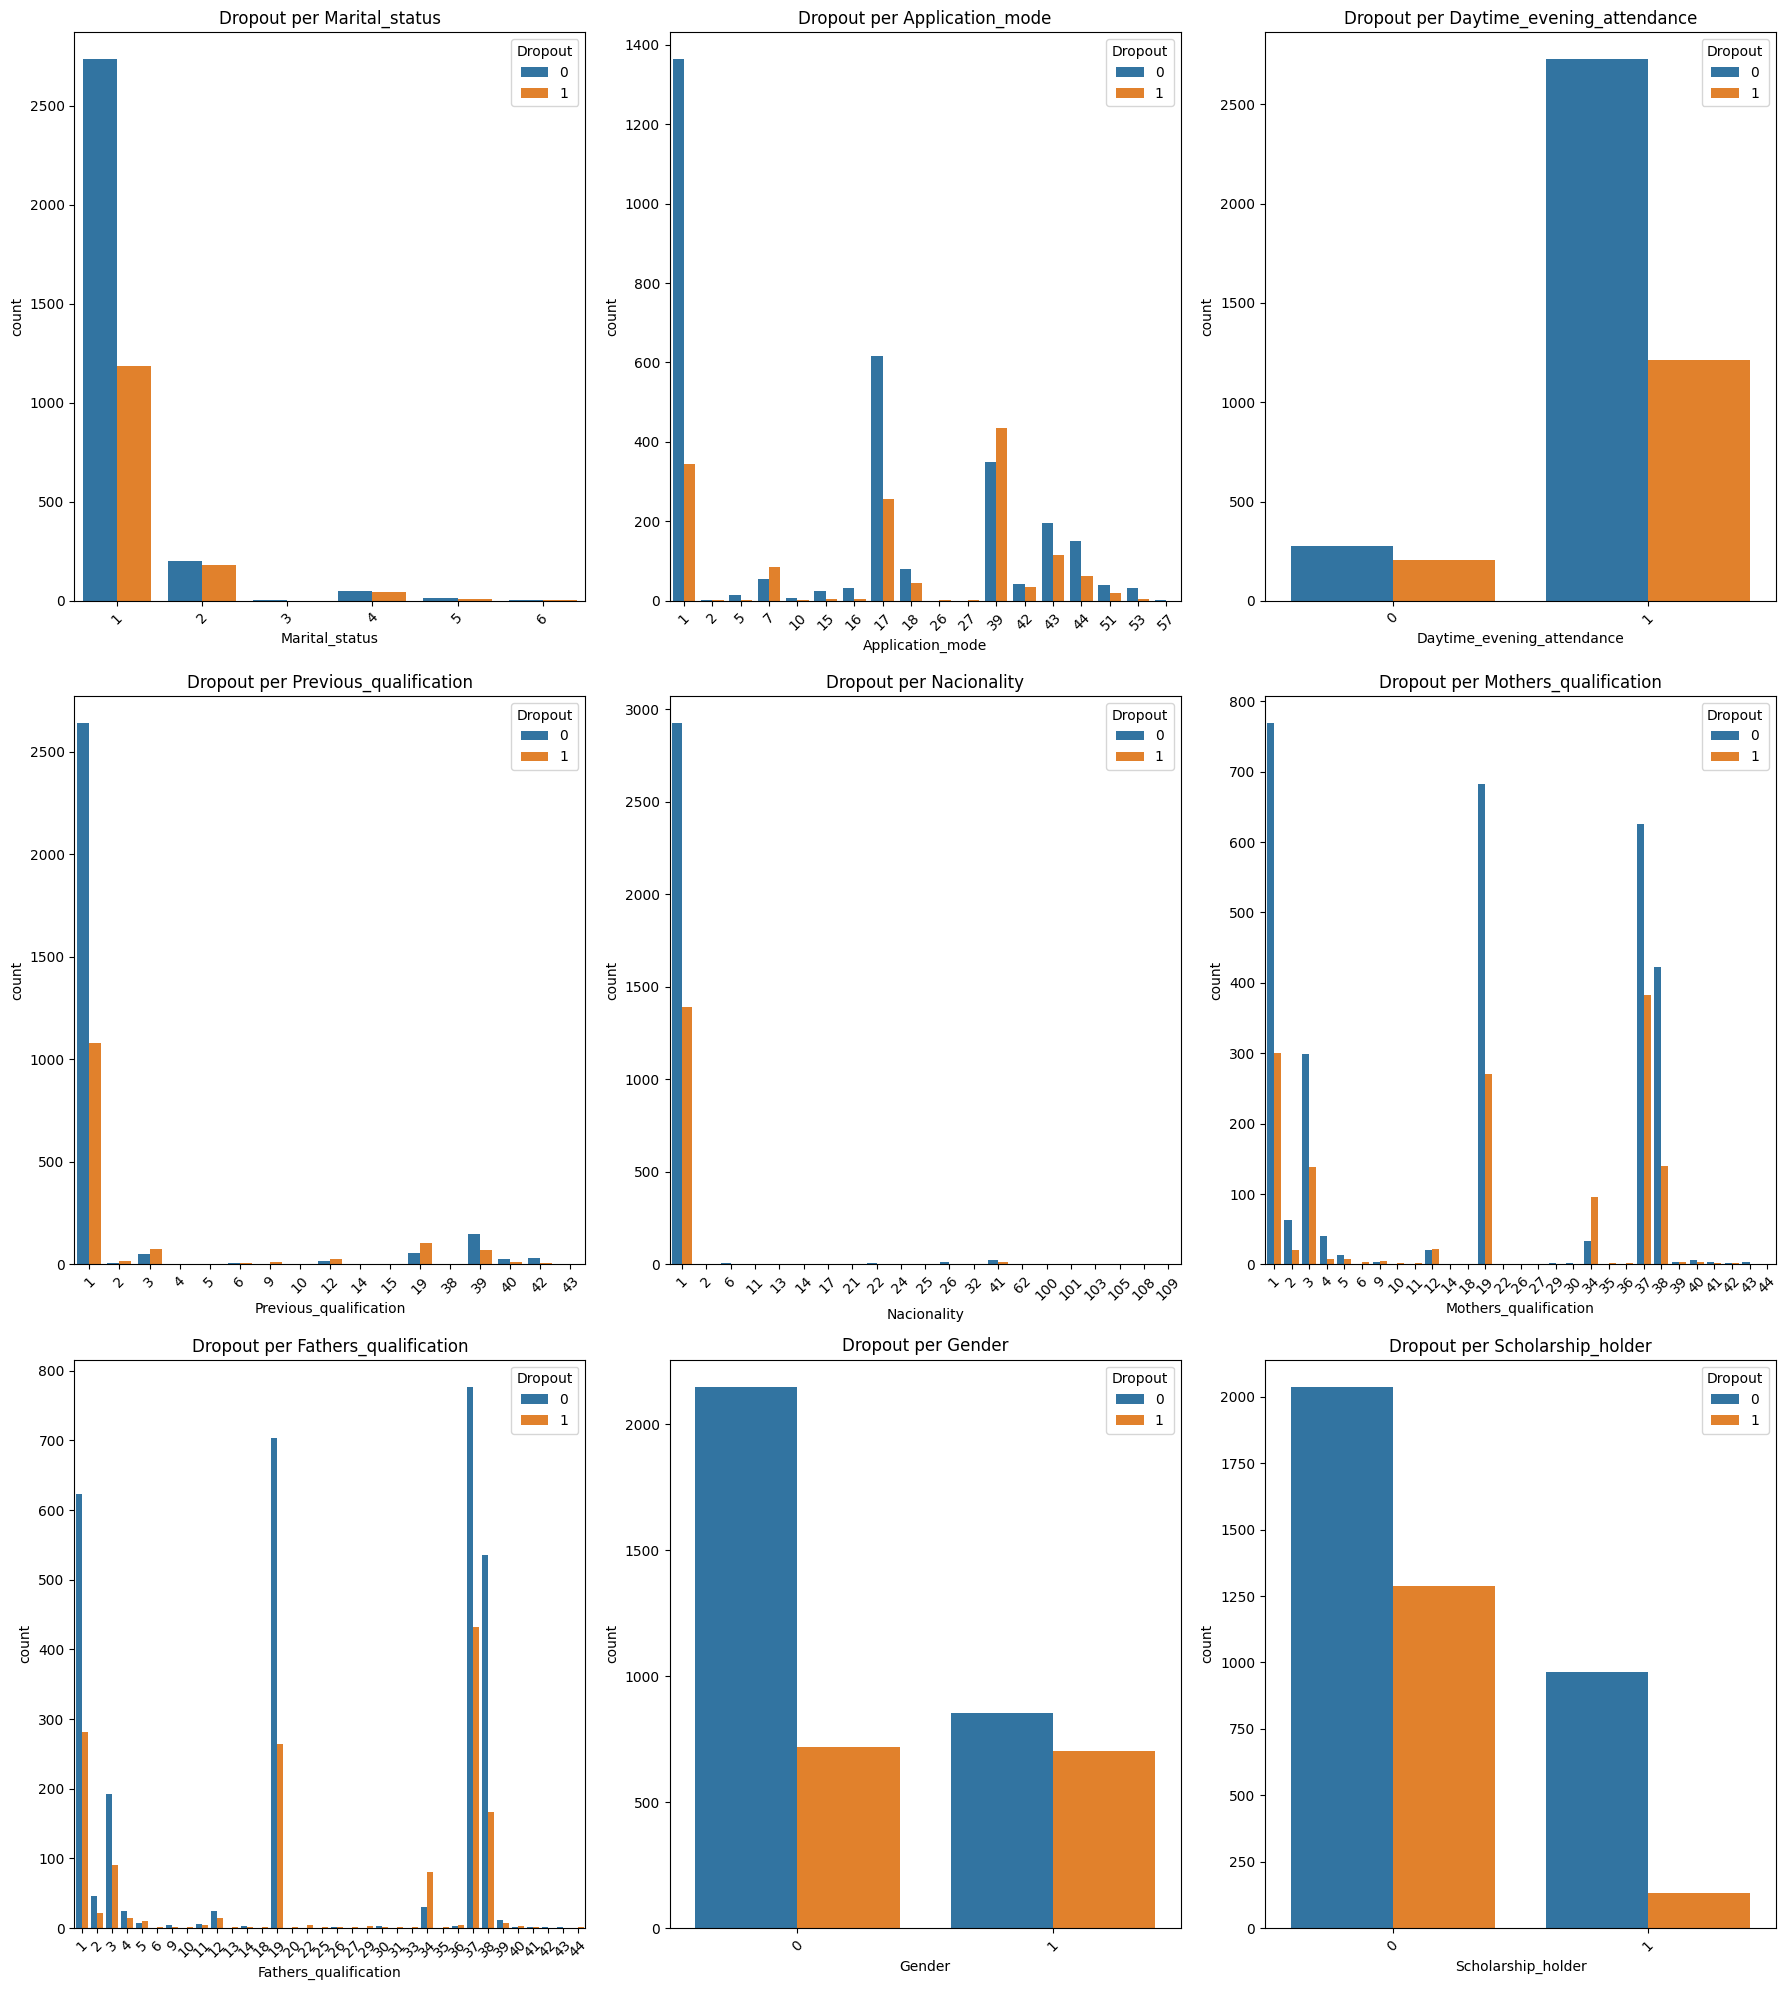

In [16]:
categorical_features = ['Marital_status', 'Application_mode', 'Daytime_evening_attendance',
                        'Previous_qualification', 'Nacionality', 'Mothers_qualification',
                        'Fathers_qualification', 'Gender', 'Scholarship_holder']

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_features[:9]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='Dropout', data=df)
    plt.title(f'Dropout per {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preparation
Tahapan persiapan data meliputi encoding target, normalisasi fitur numerik, serta pembagian data menjadi data latih dan data uji.

In [2]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('data.csv', delimiter=';')

# Encode target 'Status' (Dropout = 1, lainnya = 0)
df['Dropout'] = df['Status'].apply(lambda x: 1 if x.strip().lower() == 'dropout' else 0)

# Cek missing values
print("Missing Values:\n", df.isnull().sum())

# Pisahkan fitur dan target
X = df.drop(columns='Status')
y = df['Status']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include='number'))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Data train shape: {X_train.shape}")
print(f"Data test shape: {X_test.shape}")

Missing Values:
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                

## Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report

# Fitur dan Target
X = df.drop(columns=['Status', 'Dropout'])
y = df['Dropout']

# Scaling
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['float64', 'int64']).columns])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Simpan model dan scaler
joblib.dump(model, 'model/dropout_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.89      0.72      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885



['model/scaler.pkl']

## Conclusion & Action Items

Model klasifikasi yang telah dibangun memiliki performa evaluasi sebagai berikut:

- **Accuracy**: 89% — Menunjukkan bahwa 89% prediksi model secara keseluruhan benar.
- **Precision (Dropout class)**: 81% — Dari semua yang diprediksi dropout, 81% benar-benar dropout.
- **Recall (Dropout class)**: 73% — Model berhasil mengidentifikasi 73% dari seluruh siswa yang benar-benar dropout.
- **F1-Score (Dropout class)**: 77% — Gabungan harmonic mean dari precision dan recall.

### Kenapa model dianggap baik?
Dalam konteks prediksi dropout, recall menjadi sangat penting karena kita ingin **meminimalkan jumlah siswa berisiko dropout yang luput dari deteksi**. Model ini memiliki recall yang cukup tinggi pada kelas dropout, serta akurasi dan F1-score yang seimbang. Oleh karena itu, model ini layak digunakan sebagai sistem deteksi dini.

### Rekomendasi:
- Fokuskan perhatian pada siswa **tanpa beasiswa** dan **kelas malam** karena mereka lebih berisiko dropout.
- Lakukan **pemantauan berkala terhadap nilai dan jumlah evaluasi** yang diikuti siswa.
- Buat sistem notifikasi risiko di **dashboard pemantauan** sebagai early warning system untuk manajemen akademik.
